### ROBERTO PICHARDO MIER 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
datos = pd.read_csv("onlinefoods.csv")

In [3]:
datos.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
def calcular_distancia(p1, p2):
    # Calcular la distancia euclidiana entre dos puntos 
    return np.sqrt(np.sum(p2-p1)**2)

In [5]:
def Knn(datos_train, categorias, dato_clasificar, k):
    # Implemetacion del algoritmo Knn
    # datos_train = Conjunto de datos de entrnamiento
    # categorias = Arreglo de etiquetas
    # dato_clasificar = Dato que queremos categorizar 
    # k = Numero de vecinos cercanos 
    distancias = []
    for i in range(len(datos_train)):
        distancia = calcular_distancia(datos_train[i], dato_clasificar)
        distancias.append((distancia, categorias[i]))
    # Ordenar las distancias por tamaño
    distancias.sort(key=lambda x: x[0])
    vecinos = distancias[:k]
    clases = {}
    for vecino in vecinos:
        etiqueta = vecino[1]
        if etiqueta in clases:
            clases[etiqueta] += 1
        else:
            clases[etiqueta] = 1
    clase_predicha = max(clases, key=clases.get)

    return clase_predicha

In [6]:
datos = pd.get_dummies(datos, drop_first=True)
datos

,Age,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,...,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
1,24,3,12.9770,77.5773,560009,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
2,22,3,12.9551,77.6593,560017,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
3,22,6,12.9473,77.5616,560019,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
4,22,4,12.9850,77.5533,560010,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,2,12.9766,77.5993,560001,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
384,23,4,12.9854,77.7081,560048,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
385,22,5,12.9850,77.5533,560010,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
386,23,2,12.9770,77.5773,560009,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,1


In [7]:
columnasEliminar = ['Output_Yes', 'Unnamed: 12_Yes']
X = datos.drop(columnasEliminar,axis=1)
y = datos['Output_Yes']

In [8]:
X = X.select_dtypes(include='number')
X_means = X.mean()
X_std = X.std()

In [9]:
X_test,X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Validacion cruzada para encontrar el k (vecinos) ideal
folds = 5
# Diferentes valores de K para saber el ideal 
valores_k = [1,2,5,10,20]
# Arreglo de accuracy para calcular el mejor accuracy
accuracies = []

In [11]:
for k in valores_k:
    # Entrenar el modelo para obtener el accuracy por cada k
    tam_fold = len(X_train) // folds    # División del dataset
    fold_accuracies = []
    for i in range(folds):
        datos_test = X_train[i*tam_fold:(i+1)*tam_fold]
        datos_train_fold = np.concatenate([X_train[:i*tam_fold], X_train[(i+1)*tam_fold:]])
        etiquetas_test = y_train[i*tam_fold:(i+1)*tam_fold]
        etiquetas_train_fold = np.concatenate([y_train[:i*tam_fold],y_train[(i+1)*tam_fold:]])
        predicciones = []
        # Hacer las predicciones con KNN
        for j in range(len(datos_test)):
            clase_predicha = Knn(datos_train_fold, etiquetas_train_fold, datos_test.iloc[j], k)
            predicciones.append(clase_predicha)
        # Evaluar el modelo
        accuracy = np.mean(predicciones == etiquetas_test)
        fold_accuracies.append(accuracy)
    prom_accuracy = np.mean(fold_accuracies)
    accuracies.append(prom_accuracy)
mejor_k = valores_k[np.argmax(accuracies)]

C:\Users\odstr\AppData\Local\Temp\ipykernel_17204\4038207334.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  etiquetas_test = y_train[i*tam_fold:(i+1)*tam_fold]
C:\Users\odstr\AppData\Local\Temp\ipykernel_17204\4038207334.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  etiquetas_train_fold = np.concatenate([y_train[:i*tam_fold],y_train[(i+1)*tam_fold:]])


In [12]:
preds=[]

In [14]:
for index, row in X_test.iterrows():
    # Pasar la fila como un dato a la función Knn
    clase_predicha = Knn(X_train.values, y_train.values, row.values, mejor_k)
    preds.append(clase_predicha)

In [15]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='weighted')
recall = recall_score(y_test, preds, average='weighted')

c:\Users\odstr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
accuracy

0.7580645161290323

In [17]:
precision

0.5746618106139438

In [18]:
recall

0.7580645161290323

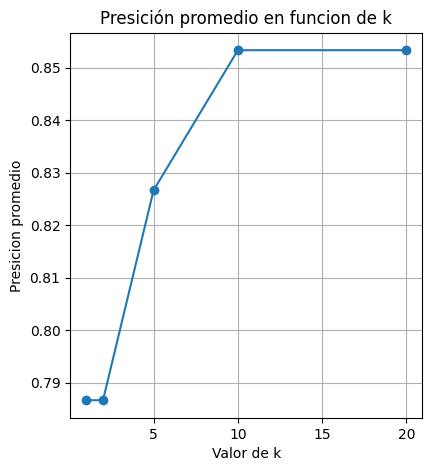

In [19]:
# Graficar la precision en funcion k
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(valores_k, accuracies, marker='o')
plt.title("Presición promedio en funcion de k")
plt.xlabel("Valor de k")
plt.ylabel("Presicion promedio")
plt.grid(True)

In [21]:
longitud_sepalo = X_test.iloc[:, 0]  # Columna 0: Longitud del sépalo
ancho_sepalo = X_test.iloc[:, 1]  

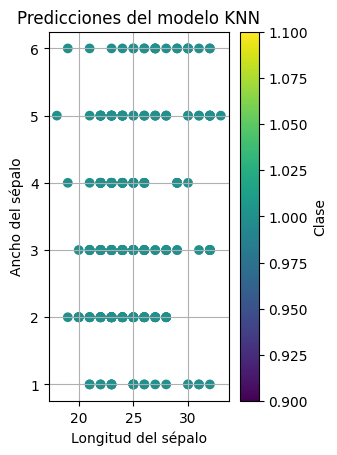

In [24]:
plt.subplot(1, 2, 2)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=preds, cmap='viridis')
plt.title("Predicciones del modelo KNN")
plt.xlabel("Longitud del sépalo")
plt.ylabel("Ancho del sépalo")
plt.colorbar(label="Clase")
plt.grid(True)

# Mostrar la figura
plt.show()